# CNN-Graph

# Tutorial

In [29]:
"""
Reference:  Understanding Logistic Regression in Python 
            https://www.datacamp.com/tutorial/understanding-logistic-regression-python
"""

'\nReference:  Understanding Logistic Regression in Python \n            https://www.datacamp.com/tutorial/understanding-logistic-regression-python\n'

## Model building

### Loading data

In [30]:
#import pandas
import pandas as pd
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
# import the class - model
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# import the metrics class - confusion matrix
from sklearn import metrics
# import required modules - visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report


In [31]:
# #import pandas
# import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, skiprows=1, names=col_names)
# First row contains:
# Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome

In [32]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Selecting features

In [33]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [34]:
X.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288


In [35]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: label, dtype: int64

### Splitting data

In [36]:
# # split X and y into training and testing sets
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

### Model development and prediction

In [37]:
# # import the class
# import tensorflow as tf
# from tensorflow.keras import layers, models
# import numpy as np

input_shape = (X_train.shape[1], 1, 1)  # (height, width, channels) for CNN
conv_filters = [64, 64]  # two conv layers
dense_units = 64
epochs = 30
batch_size = 64

# ---- Preprocess for CNN (reshape tabular to 3D tensors) ----
def preprocess_for_cnn(X):
    return np.array(X).reshape(-1, X.shape[1], 1, 1).astype("float32")

In [38]:
# instantiate the model (using the default parameters)

X_train_cnn = preprocess_for_cnn(X_train)
X_test_cnn = preprocess_for_cnn(X_test)

# ---- CNN Model for Tabular Data ----
model = models.Sequential([
    layers.Conv2D(conv_filters[0], (2, 1), activation='relu', input_shape=input_shape),
    layers.Conv2D(conv_filters[1], (2, 1), activation='relu'),
    layers.Flatten(),
    layers.Dense(dense_units, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# fit the model with data
model.fit(X_train_cnn, y_train, epochs=epochs, batch_size=batch_size) # , validation_split=0.2


Epoch 1/30
9/9 [==============================] - 3s 13ms/step - loss: 2.7363 - accuracy: 0.5608
Epoch 2/30
9/9 [==============================] - 0s 13ms/step - loss: 1.2316 - accuracy: 0.6024
Epoch 3/30
9/9 [==============================] - 0s 13ms/step - loss: 0.9594 - accuracy: 0.6424
Epoch 4/30
9/9 [==============================] - 0s 12ms/step - loss: 0.7543 - accuracy: 0.6163
Epoch 5/30
9/9 [==============================] - 0s 13ms/step - loss: 0.6993 - accuracy: 0.6319
Epoch 6/30
9/9 [==============================] - 0s 14ms/step - loss: 0.8312 - accuracy: 0.6059
Epoch 7/30
9/9 [==============================] - 0s 12ms/step - loss: 0.6831 - accuracy: 0.6562
Epoch 8/30
9/9 [==============================] - 0s 13ms/step - loss: 0.6194 - accuracy: 0.6753
Epoch 9/30
9/9 [==============================] - 0s 12ms/step - loss: 0.6311 - accuracy: 0.6701
Epoch 10/30
9/9 [==============================] - 0s 12ms/step - loss: 0.6197 - accuracy: 0.6719
Epoch 11/30
9/9 [============

In [39]:
y_proba = model.predict(X_test_cnn).flatten()
y_pred = (y_proba > 0.5).astype("int32")

6/6 [==============================] - 0s 7ms/step


In [40]:
# Compare label counts before and after 
print("Data label distribution:\n", pd.Series(y_test).value_counts(normalize=True))
print("Original y_pred distribution:\n", pd.Series(y_pred).value_counts(normalize=True))
# print("Drifted y_pred distribution:\n", pd.Series(y_pred_drifted).value_counts(normalize=True))

Data label distribution:
 label
0    0.651042
1    0.348958
Name: proportion, dtype: float64
Original y_pred distribution:
 0    0.859375
1    0.140625
Name: proportion, dtype: float64


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6979166666666666
Precision: 0.6666666666666666
Recall: 0.26865671641791045


In [42]:
# Save
# Add predictions to test dataset
normal_test_results = X_test.copy()
normal_test_results['true_label'] = y_test.values
normal_test_results['y_pred'] = y_pred

In [43]:
normal_test_results.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree,true_label,y_pred
515,3,105,31.6,28,163,70,0.268,1,0
462,8,49,35.3,39,74,70,0.705,0,0
55,1,0,23.0,21,73,50,0.248,0,0
684,5,0,0.0,69,136,82,0.640,0,0
383,1,59,25.1,25,90,62,1.268,0,0


In [44]:
normal_test_results.to_csv('./cnn/diabetes_normal.csv', index=False)

## Trigger Drift

### Check feature importance

In [45]:
# # Get feature importance from logistic regression coefficients
# coefficients = pd.Series(logreg.coef_[0], index=X_train.columns)  # logreg.coef_ is a 2D array ([n_classes, n_features], binary [0] 
# coefficients = coefficients.sort_values(key=abs, ascending=False)  # Sort by absolute importance

# # Plot
# plt.figure(figsize=(8, 5))
# coefficients.plot(kind='bar', title='Feature Importance (Logistic Regression Coefficients)')
# plt.ylabel('Coefficient Value')
# plt.tight_layout()
# plt.show()

In [46]:
# print("Model Coefficients:\n", coefficients) # positive means you can increase to push 

In [47]:
print(pima['pedigree'].describe())

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: pedigree, dtype: float64


## input data quality

In [108]:
# Create a drifted test set by increasing the 'pedigree' feature
# ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X_test_drifted_quality = X_test.copy()
# X_test_drifted['pedigree'] = X_test_drifted['pedigree'] * 1.5
# X_test_drifted_quality['pedigree'] = -1 * X_test_drifted_quality['pedigree']

# X_test_drifted_quality['insulin'] = -1 * X_test_drifted_quality['insulin']
X_test_drifted_quality['insulin'] = np.nan

# mask = np.random.choice([True, False], size=len(X_test_drifted_quality), p=[0.7, 0.3])
# X_test_drifted_quality.loc[mask, 'insulin'] = -1 * X_test_drifted_quality.loc[mask, 'insulin']

# mask = np.random.choice([True, False], size=len(X_test_drifted_quality), p=[0.9, 0.1])
# X_test_drifted_quality.loc[mask, 'insulin'] = np.nan

In [109]:
X_test_drifted_quality_cnn = preprocess_for_cnn(X_test_drifted_quality)

y_proba_drifted_quality = model.predict(X_test_drifted_quality_cnn).flatten()
y_pred_drifted_quality = (y_proba_drifted_quality > 0.5).astype("int32")

6/6 [==============================] - 0s 1ms/step


In [110]:
# Save
# Add predictions to test dataset
quality_test_results = X_test_drifted_quality.copy()
quality_test_results['true_label'] = y_test.values
quality_test_results['y_pred'] = y_pred
quality_test_results['y_pred_drifted'] = y_pred_drifted_quality

quality_test_results.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree,true_label,y_pred,y_pred_drifted
515,3,NaN,31.6,28,163,70,0.268,1,0,0
462,8,NaN,35.3,39,74,70,0.705,0,0,0
55,1,NaN,23.0,21,73,50,0.248,0,0,0
684,5,NaN,0.0,69,136,82,0.640,0,0,0
383,1,NaN,25.1,25,90,62,1.268,0,0,0


In [111]:
quality_test_results.to_csv('./cnn/diabetes_quality_drift.csv', index=False)

In [112]:
from psi import calculate_psi

# y_pred = y_pred.map({False:0,True:1})
# y_pred_drift = y_pred_drift.map({False:0,True:1})
y_pred = np.vectorize({False: 0, True: 1}.get)(y_pred)
y_pred_drifted_quality = np.vectorize({False: 0, True: 1}.get)(y_pred_drifted_quality)


calculate_psi(y_pred, y_pred_drifted_quality, buckets=2, axis=1)
#0.5528727306841743

1.039932723637145

In [117]:
calculate_psi(X_test['insulin'], X_test_drifted['insulin'], buckets=3, axis=1)

8.5151807706557

In [113]:
import numpy as np
import pandas as pd
num_iterations = 200

def get_simulation_input(X_test, X_test_drift, y_pred, y_pred_drift, sample_size = 50):
    # Store results for each iteration
    X_results = []
    y_results = []

    df_X = pd.DataFrame(columns=X_test.columns)
    arr_y = np.array([])

    for i in range(1, num_iterations + 1):
        if i <= 100:
            # First 100 iterations: Choose from X_test and y_pred
            random_indices = np.random.choice(len(y_pred), size=sample_size, replace=False)
            X_sample = X_test.iloc[random_indices]
            y_sample = y_pred[random_indices]
            # print(type(X_sample))
            # print(type(y_sample))
        elif 101 <= i <= 110:
            # Iterations 101-110: Choose from X_test_drift and y_pred_drift
            random_indices = np.random.choice(len(y_pred_drift), size=sample_size, replace=False)
            X_sample = X_test_drift.iloc[random_indices]
            y_sample = y_pred_drift[random_indices]
        else:
            # Iterations 111-200: Choose from X_test and y_pred
            random_indices = np.random.choice(len(y_pred), size=sample_size, replace=False)
            X_sample = X_test.iloc[random_indices]
            y_sample = y_pred[random_indices]

        df_X = pd.concat([df_X, X_sample], ignore_index=True)
        arr_y = np.append(arr_y, y_sample)
    return df_X, arr_y


In [114]:
from psi import calculate_psi


def get_psi_for_simulation_data(arr_y, window_size = 300):
    psi_values = []
    results = arr_y
    # Check if results array has enough data
    if len(results) < window_size:
        print("Not enough data in results for sliding window.")
    else:
        # Sliding window loop
        for start in range(len(results) - window_size + 1):
            # Get the current window
            window = results[start:start + window_size]
        
            # Extract expected and actual values
            expected = window[:window_size // 2]  # First half of the window
            actual = window[window_size // 2:]   # Second half of the window
        
            # Debugging: Check sizes
            # print(f"Processing window starting at index {start}")
            # print(f"Expected size: {len(expected)}, Actual size: {len(actual)}")
        
            # Calculate PSI for the current window
            psi_value = calculate_psi(expected, actual, buckets=2, axis=0)
            psi_values.append(psi_value)
    return psi_values

In [115]:
import matplotlib.pyplot as plt

def plot_psi(psi_values, title):
    # Assuming psi_values is already calculated
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(psi_values)), psi_values, marker='o', linestyle='-', color='b', label='PSI Value')
    # plt.title('PSI Values Over Sliding Windows for classification result (y): model drift by data drift', fontsize=16)
    plt.title(title, fontsize=16)
    plt.xlabel('Sliding Window Index', fontsize=14)
    plt.ylabel('PSI Value', fontsize=14)
    plt.axhline(y=0.1, color='r', linestyle='--', label='Threshold (0.1)')
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

/tmp/ipykernel_78984/2162101373.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_X = pd.concat([df_X, X_sample], ignore_index=True)
/home/fogo/Documents/tasks/bcbs-pot/psi.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  input /= np.max(input) / (max - min)


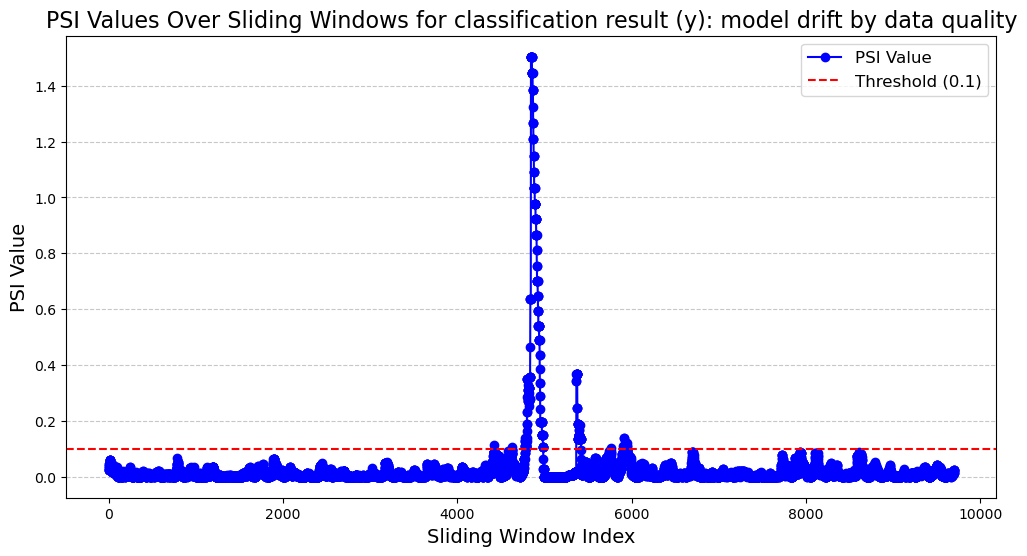

In [116]:
df_X, arr_y =  get_simulation_input(X_test, X_test_drifted_quality, y_pred, y_pred_drifted_quality, sample_size = 50)
psi_values = get_psi_for_simulation_data(arr_y, window_size = 300)
title='PSI Values Over Sliding Windows for classification result (y): model drift by data quality'
plot_psi(psi_values, title)

## input data drift

In [57]:
# Create a drifted test set by increasing the 'pedigree' feature
X_test_drifted = X_test.copy()
# X_test_drifted['pedigree'] = X_test_drifted['pedigree'] * 1.5
# X_test_drifted['pedigree'] = -1 * X_test_drifted['pedigree']

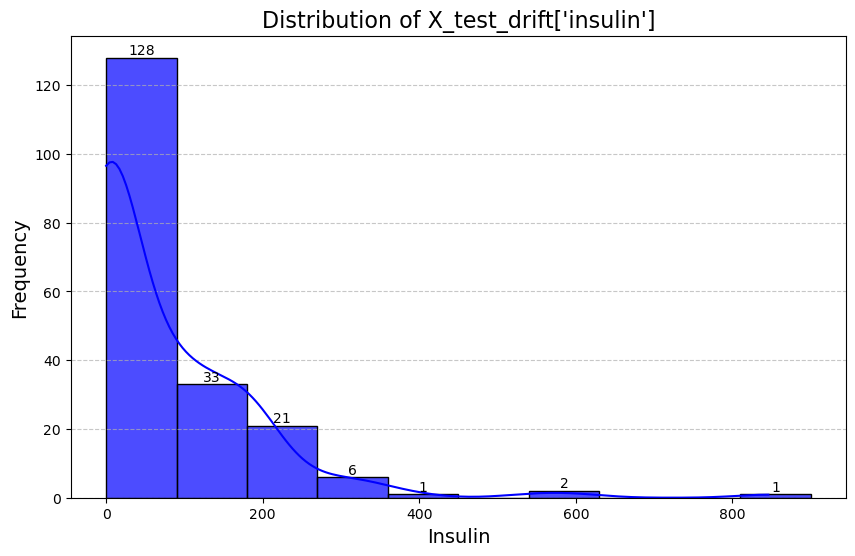

In [58]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Plot the distribution of 'pedigree'
# plt.figure(figsize=(10, 6))
# sns.histplot(X_test['insulin'], bins=[0, 1, 2, 3], binrange=(0, 3), kde=True, color='blue', alpha=0.7)
# plt.title('Distribution of X_test[\'insulin\']', fontsize=16)
# plt.xlabel('insulin', fontsize=14)
# plt.ylabel('Frequency', fontsize=14)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of 'pedigree'
plt.figure(figsize=(10, 6))
ax = sns.histplot(X_test['insulin'], kde=True, color='blue', alpha=0.7, bins=[0, 90, 180, 270, 360, 450, 540, 630, 720, 810, 900], binrange=(0, 900))

# Annotate each bar with its height
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Only annotate bars with a height greater than 0
        ax.annotate(f'{int(height)}', 
                    (patch.get_x() + patch.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.title('Distribution of X_test_drift[\'insulin\']', fontsize=16)
plt.xlabel('Insulin', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [59]:
max_value = X_test['insulin'].max()
print(max_value)

846


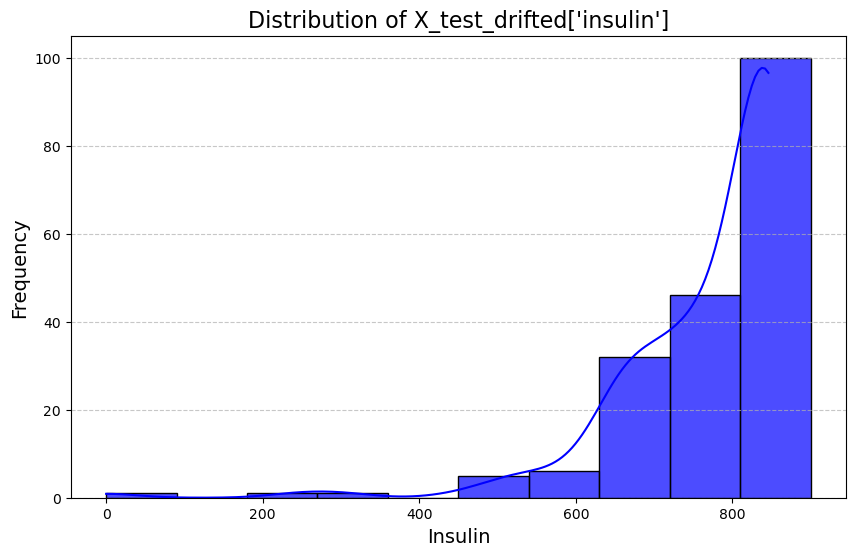

In [60]:
X_test_drifted['insulin'] = max_value - X_test_drifted['insulin']

# Display the mirrored column
plt.figure(figsize=(10, 6))
sns.histplot(X_test_drifted['insulin'], kde=True, color='blue', alpha=0.7, bins=[0, 90, 180, 270, 360, 450, 540, 630, 720, 810, 900], binrange=(0, 900))  # bins=[0, 1, 2, 3], binrange=(0, 3)
plt.title('Distribution of X_test_drifted[\'insulin\']', fontsize=16)
plt.xlabel('Insulin', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [61]:
X_test_drifted_cnn = preprocess_for_cnn(X_test_drifted)

y_proba_drifted = model.predict(X_test_drifted_cnn).flatten()
y_pred_drifted = (y_proba_drifted > 0.5).astype("int32")

6/6 [==============================] - 0s 7ms/step


In [62]:
# Save
# Add predictions to test dataset
data_test_results = X_test_drifted.copy()
data_test_results['true_label'] = y_test.values
data_test_results['y_pred'] = y_pred
data_test_results['y_pred_drifted'] = y_pred_drifted

data_test_results.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree,true_label,y_pred,y_pred_drifted
515,3,741,31.6,28,163,70,0.268,1,0,1
462,8,797,35.3,39,74,70,0.705,0,0,1
55,1,846,23.0,21,73,50,0.248,0,0,1
684,5,846,0.0,69,136,82,0.640,0,0,1
383,1,787,25.1,25,90,62,1.268,0,0,1


In [63]:
data_test_results.to_csv('./cnn/diabetes_data_drift.csv', index=False)

In [64]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6979166666666666
Precision: 0.6666666666666666
Recall: 0.26865671641791045


In [65]:
accuracy = accuracy_score(y_test, y_pred_drifted)
precision = precision_score(y_test, y_pred_drifted)
recall = recall_score(y_test, y_pred_drifted)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.34375
Precision: 0.34554973821989526
Recall: 0.9850746268656716


In [66]:
y_pred = np.vectorize({False: 0, True: 1}.get)(y_pred)
y_pred_drifted = np.vectorize({False: 0, True: 1}.get)(y_pred_drifted)


calculate_psi(y_pred, y_pred_drifted, buckets=2, axis=1)

6.032451322367877

In [67]:
calculate_psi(X_test['insulin'], X_test_drifted['insulin'], buckets=20, axis=1)

10.626440907726211

/tmp/ipykernel_78984/2162101373.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_X = pd.concat([df_X, X_sample], ignore_index=True)
/home/fogo/Documents/tasks/bcbs-pot/psi.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  input /= np.max(input) / (max - min)


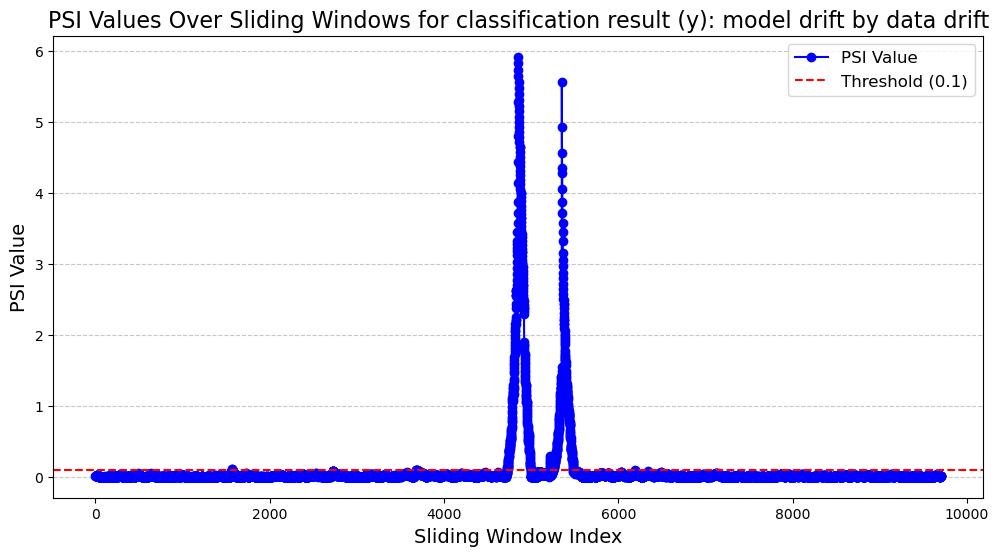

In [68]:
df_X, arr_y =  get_simulation_input(X_test, X_test_drifted, y_pred, y_pred_drifted, sample_size = 50)
psi_values = get_psi_for_simulation_data(arr_y, window_size = 300)
title='PSI Values Over Sliding Windows for classification result (y): model drift by data drift'
plot_psi(psi_values, title)

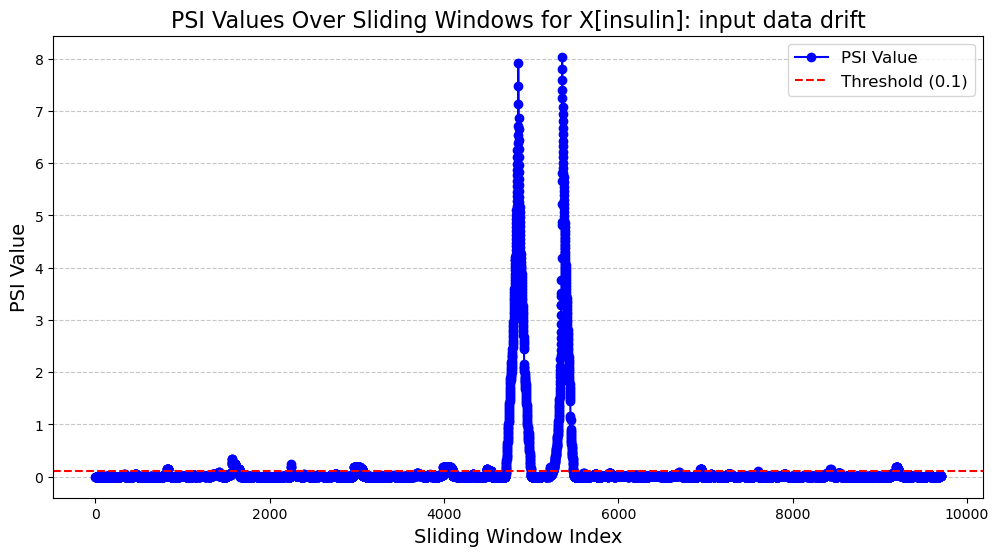

In [69]:
results = df_X['insulin']
psi_values = get_psi_for_simulation_data(results, window_size = 300)
title='PSI Values Over Sliding Windows for X[insulin]: input data drift'
plot_psi(psi_values, title)

# Model drift graphs

In [70]:
import numpy as np
import pandas as pd
num_iterations = 200
sample_size = 50

# Store results for each iteration
X_results = []
y_results = []

df_X = pd.DataFrame(columns=X_test.columns)
arr_y = np.array([])

for i in range(1, num_iterations + 1):
    if i <= 100:
        # First 100 iterations: Choose from X_test and y_pred
        random_indices = np.random.choice(len(y_pred), size=sample_size, replace=False)
        X_sample = X_test.iloc[random_indices]
        y_sample = y_pred[random_indices]
        # print(type(X_sample))
        # print(type(y_sample))
    elif 101 <= i <= 110:
        # Iterations 101-110: Choose from X_test_drift and y_pred_drift
        random_indices = np.random.choice(len(y_pred_drifted), size=sample_size, replace=False)
        X_sample = X_test_drifted.iloc[random_indices]
        y_sample = y_pred_drifted[random_indices]
    else:
        # Iterations 111-200: Choose from X_test and y_pred
        random_indices = np.random.choice(len(y_pred), size=sample_size, replace=False)
        X_sample = X_test.iloc[random_indices]
        y_sample = y_pred[random_indices]

    df_X = pd.concat([df_X, X_sample], ignore_index=True)
    arr_y = np.append(arr_y, y_sample)


/tmp/ipykernel_78984/1001318116.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_X = pd.concat([df_X, X_sample], ignore_index=True)


In [71]:
len(df_X)
len(arr_y)

10000

In [72]:
window_size = 300
psi_values = []

results = arr_y
# Check if results array has enough data
if len(results) < window_size:
    print("Not enough data in results for sliding window.")
else:
    # Sliding window loop
    for start in range(len(results) - window_size + 1):
        # Get the current window
        window = results[start:start + window_size]
        
        # Extract expected and actual values
        expected = window[:window_size // 2]  # First half of the window
        actual = window[window_size // 2:]   # Second half of the window
        
        # Debugging: Check sizes
        # print(f"Processing window starting at index {start}")
        # print(f"Expected size: {len(expected)}, Actual size: {len(actual)}")
        
        # Calculate PSI for the current window
        psi_value = calculate_psi(expected, actual, buckets=2, axis=0)
        psi_values.append(psi_value)

# Print or process the PSI values
# print("PSI values for sliding windows:", psi_values)

/home/fogo/Documents/tasks/bcbs-pot/psi.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  input /= np.max(input) / (max - min)


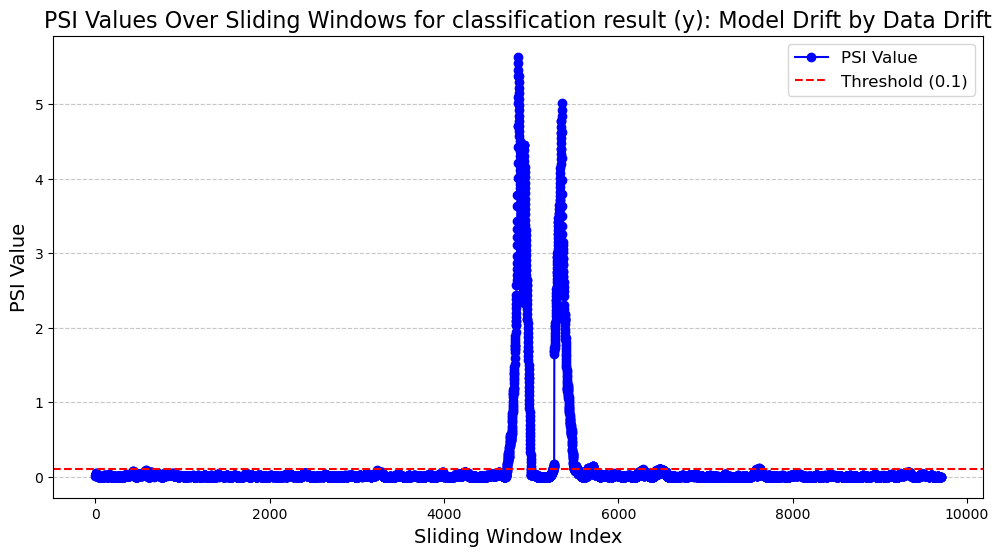

In [73]:
import matplotlib.pyplot as plt

# Assuming psi_values is already calculated
plt.figure(figsize=(12, 6))
plt.plot(range(len(psi_values)), psi_values, marker='o', linestyle='-', color='b', label='PSI Value')
plt.title('PSI Values Over Sliding Windows for classification result (y): Model Drift by Data Drift', fontsize=16)
plt.xlabel('Sliding Window Index', fontsize=14)
plt.ylabel('PSI Value', fontsize=14)
plt.axhline(y=0.1, color='r', linestyle='--', label='Threshold (0.1)')
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [74]:
window_size = 300
psi_values = []

results = df_X['pedigree']
# Check if results array has enough data
if len(results) < window_size:
    print("Not enough data in results for sliding window.")
else:
    # Sliding window loop
    for start in range(len(results) - window_size + 1):
        # Get the current window
        window = results[start:start + window_size]
        
        # Extract expected and actual values
        expected = window[:window_size // 2]  # First half of the window
        actual = window[window_size // 2:]   # Second half of the window
        
        # Debugging: Check sizes
        # print(f"Processing window starting at index {start}")
        # print(f"Expected size: {len(expected)}, Actual size: {len(actual)}")
        
        # Calculate PSI for the current window
        psi_value = calculate_psi(expected, actual, buckets=3, axis=0)
        psi_values.append(psi_value)

# Print or process the PSI values
# print("PSI values for sliding windows:", psi_values)

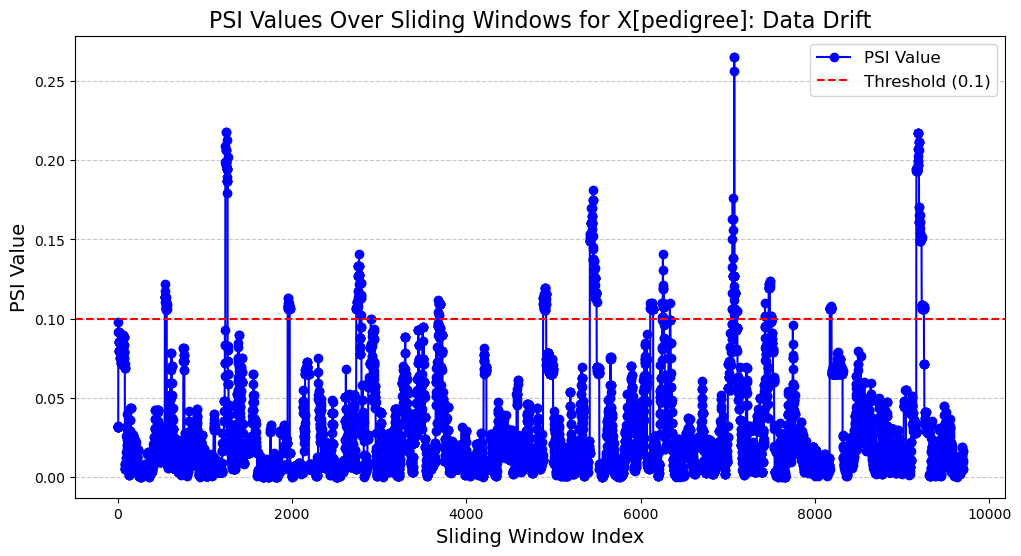

In [75]:
import matplotlib.pyplot as plt

# Assuming psi_values is already calculated
plt.figure(figsize=(12, 6))
plt.plot(range(len(psi_values)), psi_values, marker='o', linestyle='-', color='b', label='PSI Value')
plt.title('PSI Values Over Sliding Windows for X[pedigree]: Data Drift', fontsize=16)
plt.xlabel('Sliding Window Index', fontsize=14)
plt.ylabel('PSI Value', fontsize=14)
plt.axhline(y=0.1, color='r', linestyle='--', label='Threshold (0.1)')
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Data quality

In [76]:
import numpy as np
import pandas as pd
num_iterations = 200
sample_size = 50

# Store results for each iteration
X_results = []
y_results = []

df_X = pd.DataFrame(columns=X_test.columns)
arr_y = np.array([])

for i in range(1, num_iterations + 1):
    if i <= 100:
        # First 100 iterations: Choose from X_test and y_pred
        random_indices = np.random.choice(len(y_pred), size=sample_size, replace=False)
        X_sample = X_test.iloc[random_indices]
        y_sample = y_pred[random_indices]
        # print(type(X_sample))
        # print(type(y_sample))
    elif 101 <= i <= 110:
        # Iterations 101-110: Choose from X_test_drift and y_pred_drift
        random_indices = np.random.choice(len(y_pred_drifted_quality), size=sample_size, replace=False)
        X_sample = X_test_drifted_quality.iloc[random_indices]
        y_sample = y_pred_drifted_quality[random_indices]
    else:
        # Iterations 111-200: Choose from X_test and y_pred
        random_indices = np.random.choice(len(y_pred), size=sample_size, replace=False)
        X_sample = X_test.iloc[random_indices]
        y_sample = y_pred[random_indices]

    df_X = pd.concat([df_X, X_sample], ignore_index=True)
    arr_y = np.append(arr_y, y_sample)


/tmp/ipykernel_78984/414356672.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_X = pd.concat([df_X, X_sample], ignore_index=True)


In [77]:
len(df_X)
len(arr_y)

10000

In [78]:
window_size = 300
psi_values = []

results = arr_y
# Check if results array has enough data
if len(results) < window_size:
    print("Not enough data in results for sliding window.")
else:
    # Sliding window loop
    for start in range(len(results) - window_size + 1):
        # Get the current window
        window = results[start:start + window_size]
        
        # Extract expected and actual values
        expected = window[:window_size // 2]  # First half of the window
        actual = window[window_size // 2:]   # Second half of the window
        
        # Debugging: Check sizes
        # print(f"Processing window starting at index {start}")
        # print(f"Expected size: {len(expected)}, Actual size: {len(actual)}")
        
        # Calculate PSI for the current window
        psi_value = calculate_psi(expected, actual, buckets=2, axis=0)
        psi_values.append(psi_value)

# Print or process the PSI values
# print("PSI values for sliding windows:", psi_values)

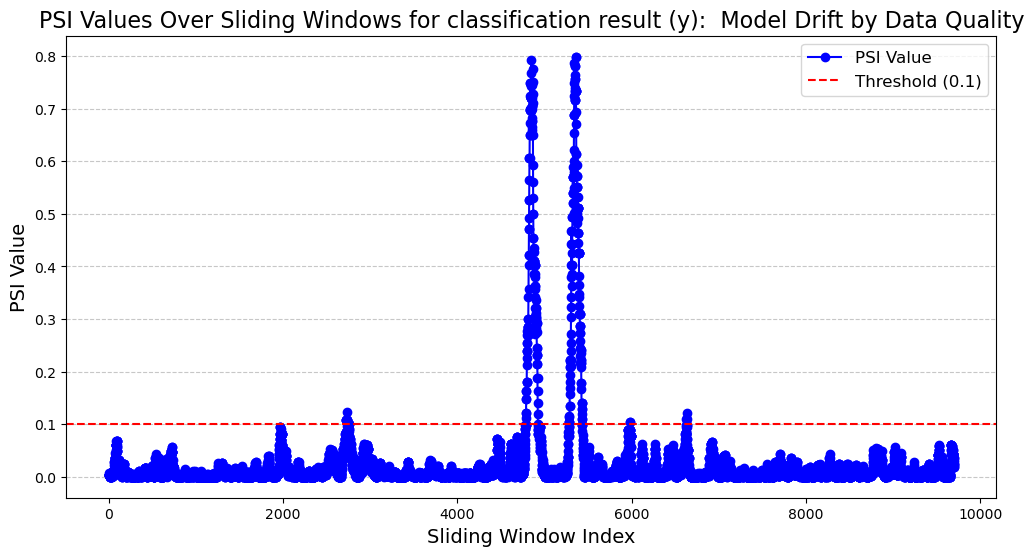

In [79]:
import matplotlib.pyplot as plt

# Assuming psi_values is already calculated
plt.figure(figsize=(12, 6))
plt.plot(range(len(psi_values)), psi_values, marker='o', linestyle='-', color='b', label='PSI Value')
plt.title('PSI Values Over Sliding Windows for classification result (y):  Model Drift by Data Quality', fontsize=16)
plt.xlabel('Sliding Window Index', fontsize=14)
plt.ylabel('PSI Value', fontsize=14)
plt.axhline(y=0.1, color='r', linestyle='--', label='Threshold (0.1)')
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()